In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp2.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_10,perc_icms_quantity__10_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.146341,...,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.000,0.000,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.080000,...,0.198069,0.739112,0.275338,1.999516,1.105093,1.334629,0.226667,0.000,0.000,0.546667
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.210227,...,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.000,0.000,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.116000,...,0.353106,0.768454,0.099146,1.637204,0.985509,1.301313,0.082000,0.344,0.556,0.018000
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.096220,...,0.263493,0.544282,0.313052,2.351887,1.113744,1.798905,0.494845,0.000,0.000,0.460481


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [5]:
corr_matrix = df_products.corr()

In [6]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_10,perc_icms_quantity__10_12,perc_icms_quantity__12_20
cat_code,1.000000,-0.145934,-0.053941,0.012216,0.184604,0.319875,-0.006926,-0.076344,-0.190358,0.085658,...,0.296342,0.034913,0.012797,0.044825,0.237868,0.013608,-0.445508,0.203622,-0.029676,0.251430
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.145934,1.000000,0.033150,0.430045,0.257194,-0.040990,0.006779,-0.031943,0.342845,0.159802,...,-0.106705,0.096977,-0.097783,-0.071968,-0.097434,-0.126014,0.064901,-0.029879,0.047619,-0.076963
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053941,0.033150,1.000000,0.114107,0.011493,-0.018215,-0.027578,0.042141,0.129401,-0.050564,...,-0.058965,0.005937,-0.060909,-0.019434,-0.093180,0.005121,0.164410,-0.018190,-0.013100,-0.143211
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012216,0.430045,0.114107,1.000000,0.439110,-0.029670,0.028259,0.225287,0.298838,-0.101909,...,-0.315890,0.217208,-0.016774,0.064952,-0.295974,-0.142681,0.075811,-0.059298,-0.042703,-0.129712
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.184604,0.257194,0.011493,0.439110,1.000000,-0.025863,0.008701,0.247089,0.429128,-0.144393,...,-0.044314,0.197928,-0.088761,-0.063936,-0.223675,-0.195560,0.040848,-0.051547,-0.022960,-0.099611


In [7]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.8 and c1 != c2: 
            print (c1, c2)

week_number_quantity_1 month_quantity_1
week_number_quantity_6 week_number_quantity_22
week_number_quantity_10 month_quantity_3
week_number_quantity_20 week_number_quantity_21
week_number_quantity_21 week_number_quantity_20
week_number_quantity_22 week_number_quantity_6
week_number_quantity_23 week_number_quantity_24
week_number_quantity_23 month_quantity_6
week_number_quantity_24 week_number_quantity_23
week_number_quantity_24 month_quantity_6
week_number_quantity_25 month_quantity_6
week_number_quantity_32 month_quantity_8
week_number_quantity_33 month_quantity_8
week_number_quantity_34 week_number_quantity_35
week_number_quantity_35 week_number_quantity_34
week_number_quantity_36 month_quantity_9
week_number_quantity_37 month_quantity_9
week_number_quantity_42 month_quantity_10
week_number_quantity_47 month_quantity_11
week_number_quantity_50 month_quantity_12
month_quantity_1 week_number_quantity_1
month_quantity_3 week_number_quantity_10
month_quantity_6 week_number_quantity_23
mo

since there is a high correlation between the weeknumbers and the month

In [8]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if 'week_number' in c
                                           ])

In [9]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50,perc_icms_quantity__0_1,perc_icms_quantity__1_10,perc_icms_quantity__10_12,perc_icms_quantity__12_20
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.495834,0.713632,0.339841,2.016804,1.144924,1.401282,0.439024,0.000,0.000,0.512195
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.000000,0.000000,0.026667,0.0,0.000000,0.040000,0.040000,0.080000,...,0.198069,0.739112,0.275338,1.999516,1.105093,1.334629,0.226667,0.000,0.000,0.546667
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.209398,0.573237,0.389380,2.791206,1.294306,1.574516,0.198864,0.000,0.000,0.795455
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.000000,0.000000,0.002000,0.0,0.034000,0.044000,0.078000,0.116000,...,0.353106,0.768454,0.099146,1.637204,0.985509,1.301313,0.082000,0.344,0.556,0.018000
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.000000,0.000000,0.000000,0.0,0.000000,0.024055,0.079038,0.096220,...,0.263493,0.544282,0.313052,2.351887,1.113744,1.798905,0.494845,0.000,0.000,0.460481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.115385,...,0.198817,0.574367,0.390467,2.522709,1.481343,1.721621,0.307692,0.000,0.000,0.692308
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.000303,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.030036,...,0.085197,1.048515,0.307750,2.159773,0.534393,0.950560,0.216930,0.000,0.000,0.635922
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023546,0.000000,0.042837,0.011064,0.0,0.007660,0.070071,0.076879,0.041135,...,0.036779,1.055931,0.289568,2.144001,0.516644,0.935224,0.171915,0.000,0.000,0.669787


In [11]:
df_products_out.shape

(130, 51)

## Using Elbow optimization with KMeans

In [13]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_b76eb9b8fc0f17098812da9117d3e500',
       'source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'source_channel_quantity_fc7020775a7cdf161ab5267985c54601',
       'month_quantity_1', 'month_quantity_2', 'mo

In [14]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.662554431832955
error = 1.662554431832955
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.7645656580712541
error = 0.8979887737617009
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.5815062490087153
error = 0.1830594090625388
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.48607303496067794
error = 0.09543321404803734
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 0.40054956346649034
error = 0.0855234714941876
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.3371933733364735
error = 0.06335619013001687
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 0.2920082696822156
error = 0.045185103654257874
###############################
Number of Clusters: 16
Starting K-mea

In [15]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [16]:
len(cluster_result.labels_)

130

In [17]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.662554431832955, 0.7645656580712541, 0.5815062490087153, 0.48607303496067794, 0.40054956346649034, 0.3371933733364735, 0.2920082696822156, 0.2535985353528312, 0.23159718175482857, 0.21347956255681452, 0.1903754211550193, 0.17815654370300674, 0.1646134890975349, 0.15327757742004836, 0.14443882258604848]
Ks  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


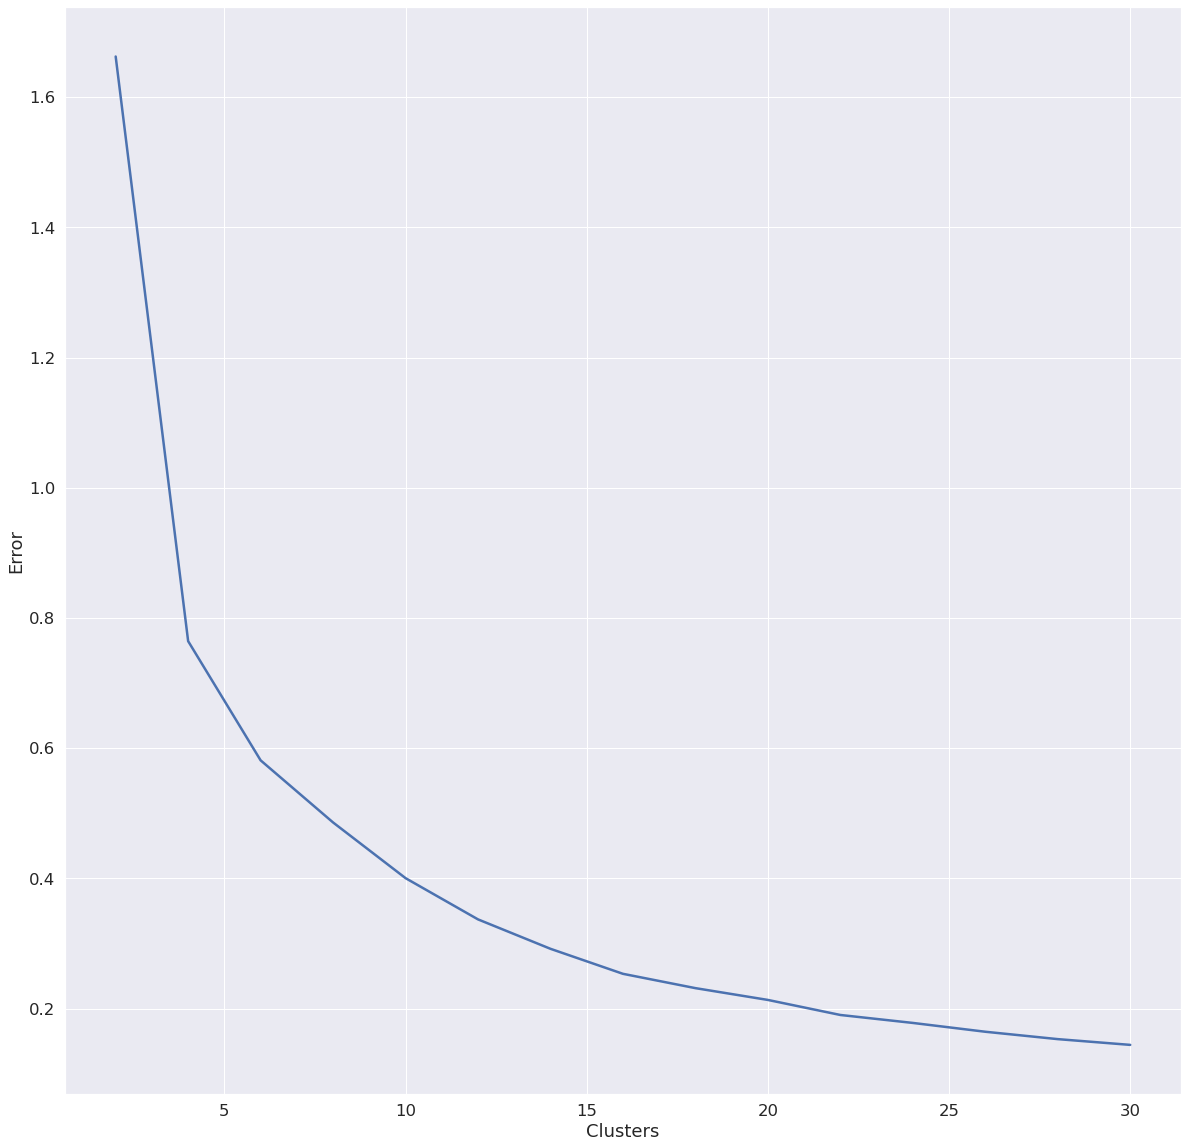

In [18]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

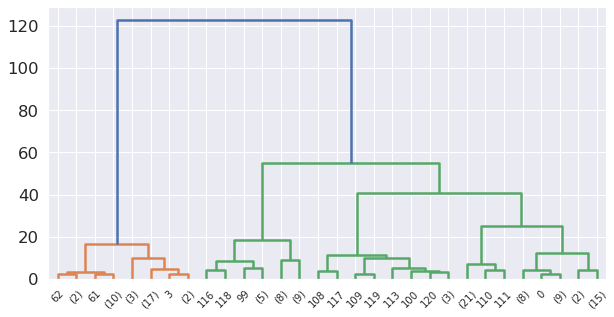

In [19]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [26]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=3)
clusters.shape, len(np.unique(clusters))

((130,), 25)

In [21]:
df_products_out['hc_cluster'] = clusters

In [22]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,13,8
1,9,1
2,11,5
3,14,9
4,10,1
5,12,1
6,24,1
7,23,21
8,25,1


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

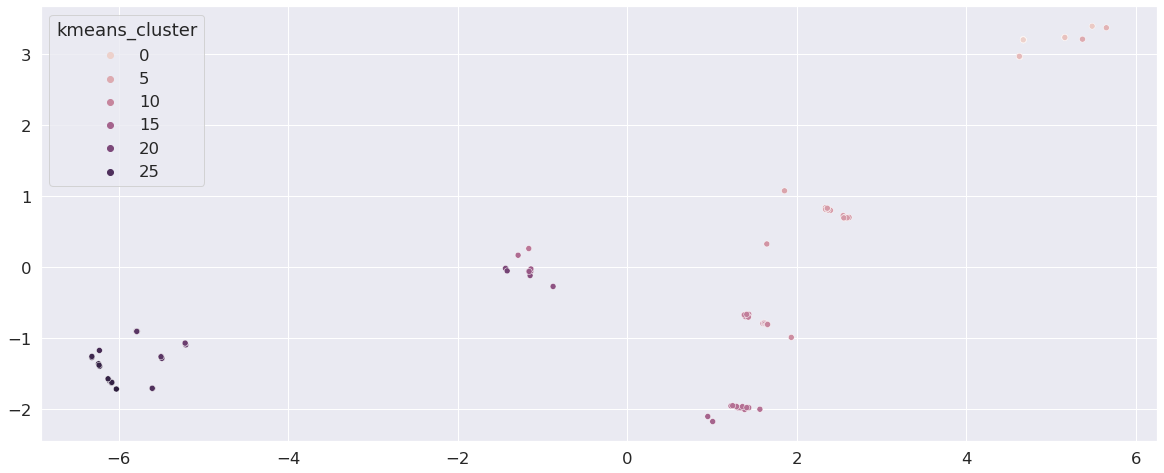

In [23]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

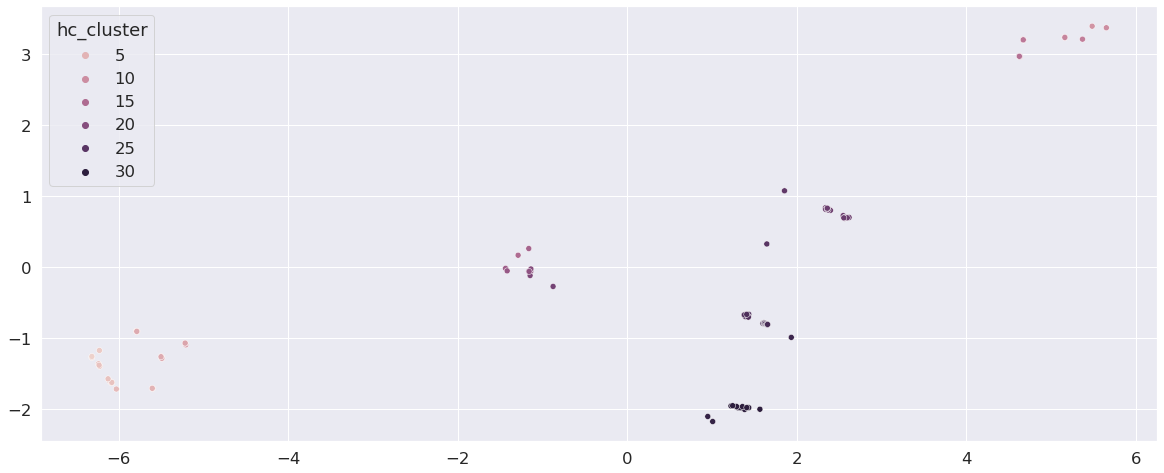

In [24]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])